In [1]:
import torch
from cornucopia import (
    IntraScanMotionTransform, ArrayCoilTransform, SmallIntraScanMotionTransform)
import  matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25, 8)

Generate a digital phantom

/homes/7/yb947/links/software/miniconda3/envs/nitorch/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


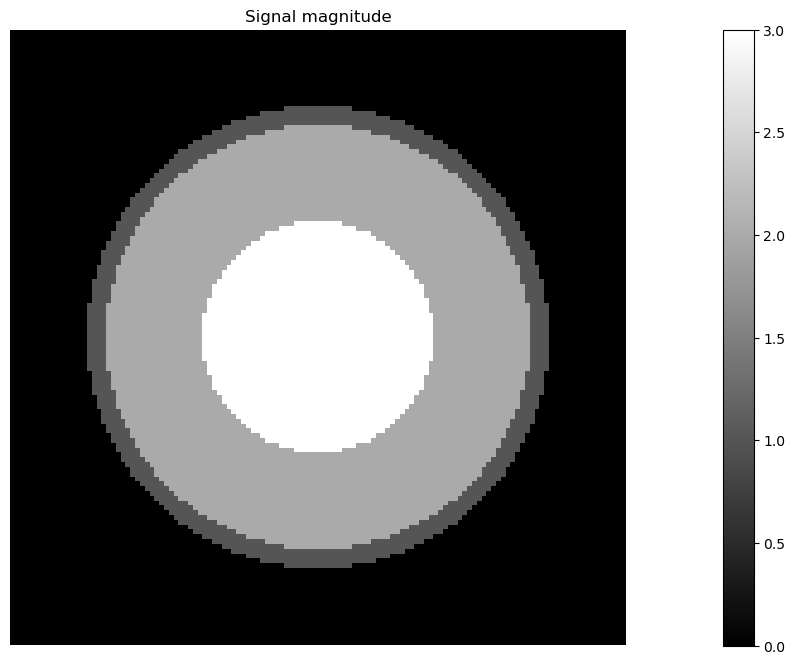

In [2]:
shape = [128, 128]
radius = torch.stack(torch.meshgrid(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

mag = torch.zeros_like(radius, dtype=torch.float32)
mag[radius < 48] = 1
mag[radius < 44] = 2
mag[radius < 24] = 3

plt.imshow(mag, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal magnitude')
plt.colorbar()
plt.show()

Build k-space from 4 shots acquired with different object position

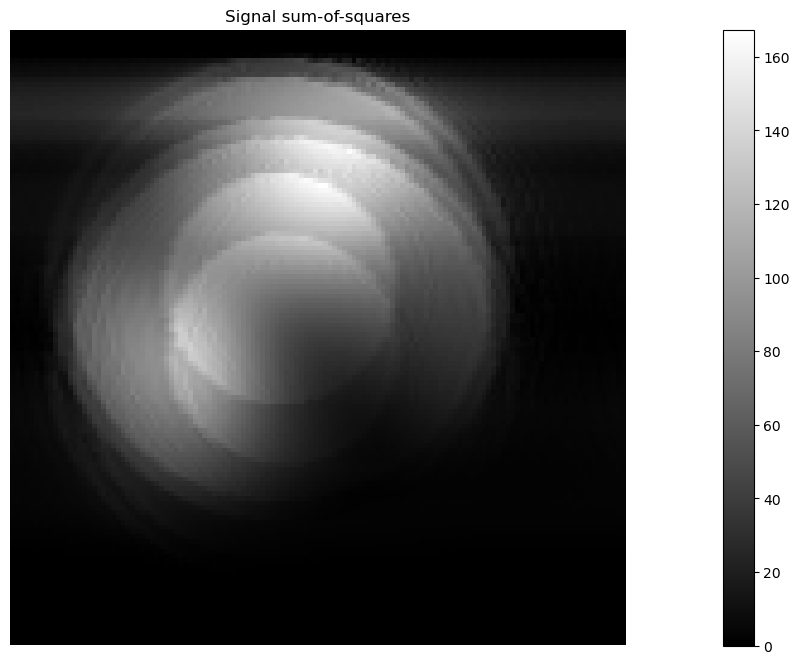

In [3]:
trf = IntraScanMotionTransform(coils=ArrayCoilTransform())
sos = trf(mag[None])[0]

plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

We can switch to a random sampling pattern

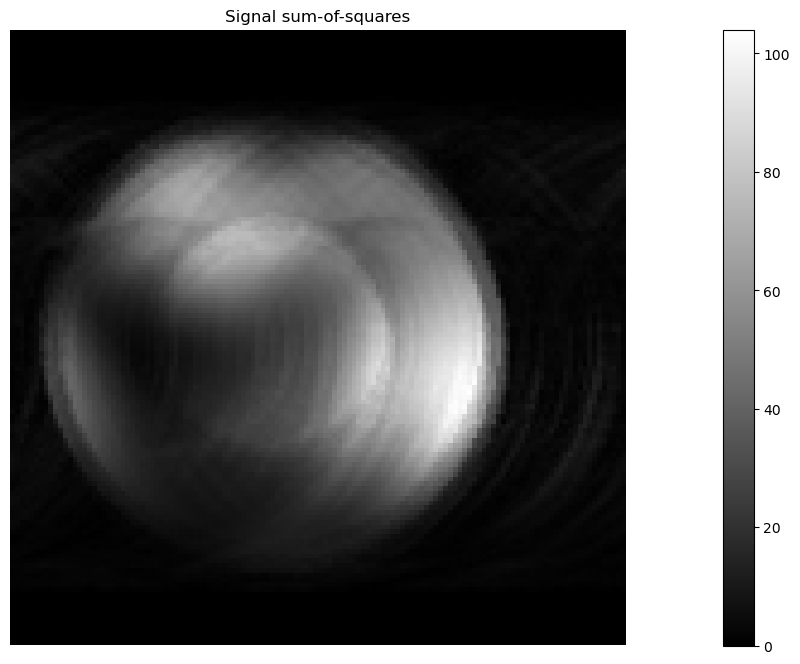

In [4]:
trf = IntraScanMotionTransform(coils=ArrayCoilTransform(), pattern='random')
sos = trf(mag[None])[0]

plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

Same experiment, but this time motion happens across a "slice" axis (no FFT involved)

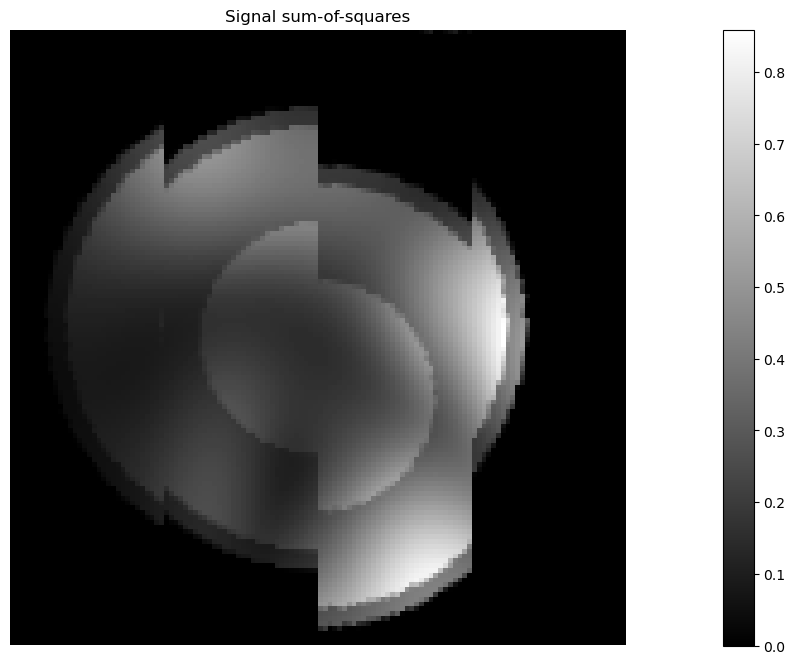

In [5]:
plt.show()
trf = IntraScanMotionTransform(coils=ArrayCoilTransform(), freq=False)
sos = trf(mag[None])[0]

plt.imshow(sos, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Signal sum-of-squares')
plt.colorbar()
plt.show()

Finally, sample some small motion

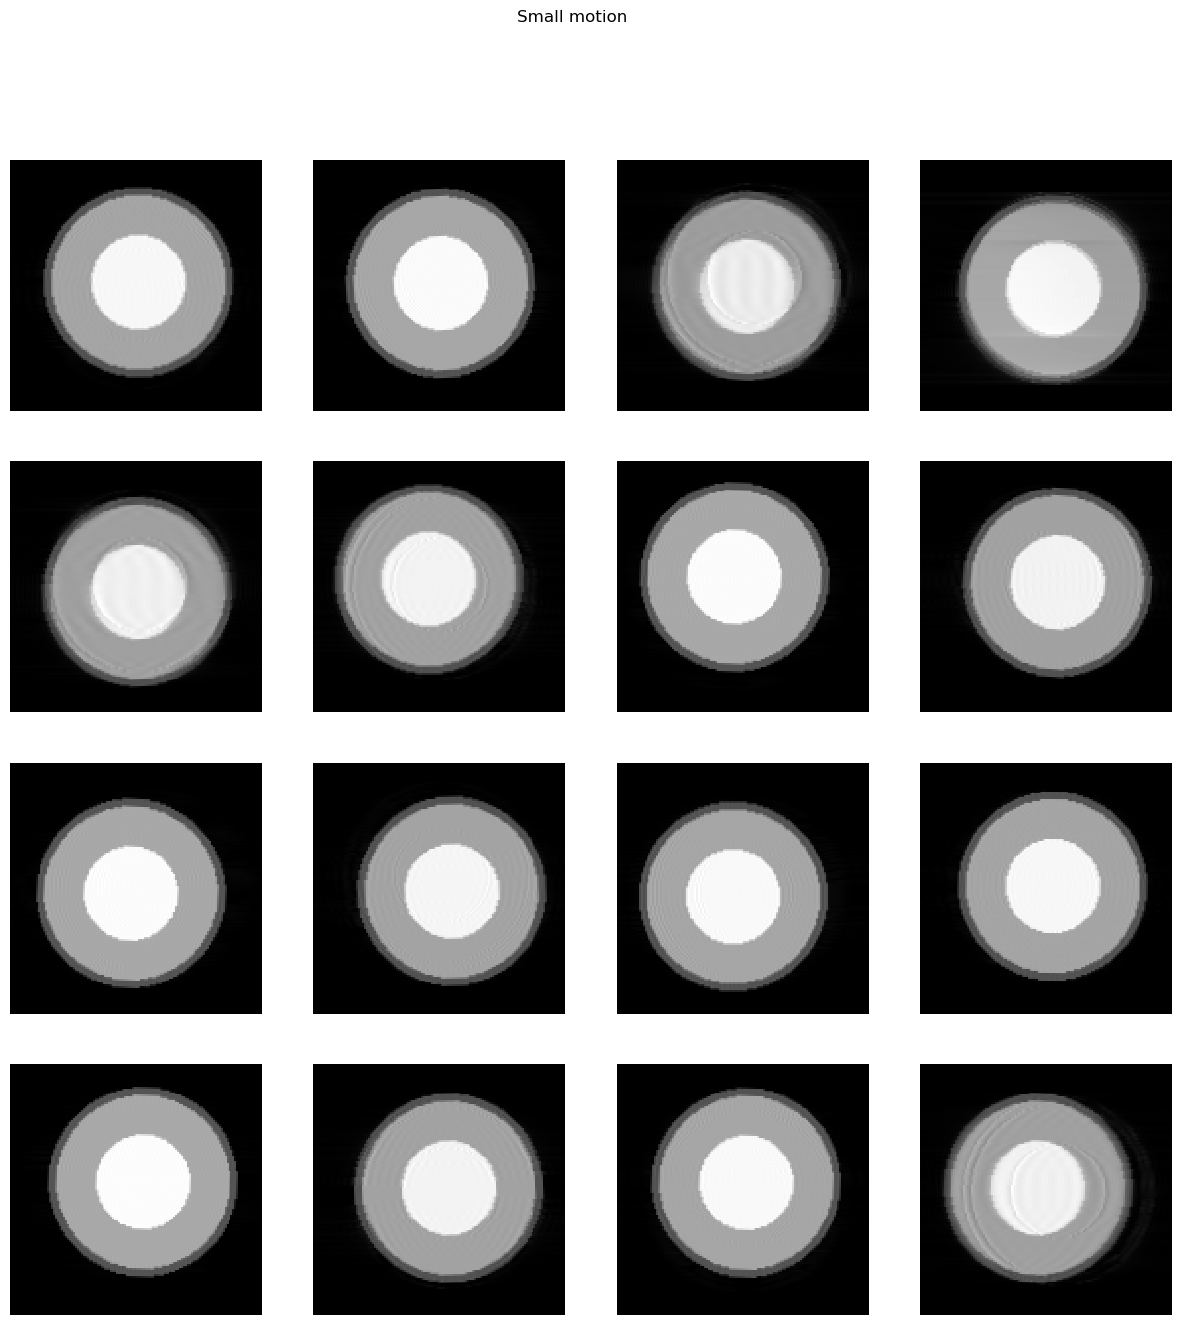

In [8]:
trf = SmallIntraScanMotionTransform()

shape = [4, 4]
plt.rcParams["figure.figsize"] = (15, 15)

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(mag[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.suptitle('Small motion')
plt.show()